In [1]:
import numpy as np
import qilisdk
import qutip as qt
import matplotlib.pyplot as plt
import sys

In [2]:
sys.path.append('/Users/omichel/Desktop/qilimanjaro/projects/retech/retech_2025/src')

import hamiltonian

In [3]:
# class QiliSDKHamiltonian():
    
#     def __init__(self,size):
#         self.size = size
#         self.H = 0
    
#     def add_local_field(self, qubit, field, weight=1.):

#         assert qubit <= self.size-1, f"Index {qubit} out of range. Size of the system is {self.size}"
        
#         self.H += weight*field(qubit)

#     def add_ZZ_term(self, qubit1, qubit2, weight=1.):

#         assert qubit1<= self.size-1, f"Index {qubit1} out of range. Size of the system is {self.size}"
#         assert qubit2 <= self.size-1, f"Index {qubit2} out of range. Size of the system is {self.size}"
#         assert qubit1 != qubit2,    f"Qubits 1 and 2 are the same, cannot apply self-interaction term"

#         self.H += weight*Z(qubit1)*Z(qubit2)
        
              


In [6]:
def create_random_hamiltonian(Nqubits, min_weight, max_weight):
    H_out = hamiltonian.QutipHamiltonian(Nqubits)
    single_x_weights = np.random.uniform(min_weight, max_weight, size=Nqubits)
    single_z_weights = np.random.uniform(min_weight, max_weight, size=Nqubits)

    interaction_weights = np.random.uniform(min_weight, max_weight, size=int(Nqubits*(Nqubits-1)/2))
    interaction_counter = 0
    for i in range(Nqubits):
        H_out.add_x_field(i, single_x_weights[i])
        H_out.add_z_field(i, single_z_weights[i])

        for j in range(i+1, Nqubits):
            H_out.add_ZZ_term(i, j, interaction_weights[interaction_counter])
            interaction_counter+=1
    
    return H_out

In [7]:
H_test = create_random_hamiltonian(1, -1.0, 1.0)

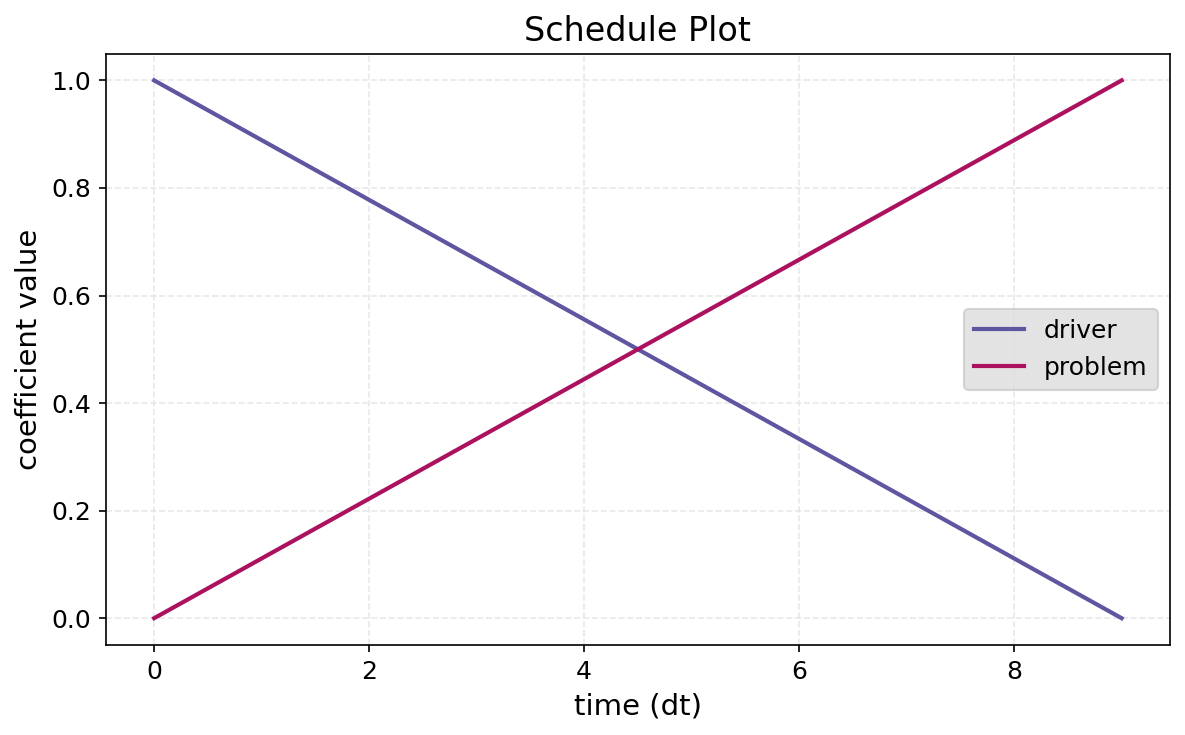

In [ ]:
    options = {'method': 'adams'}

    simulation_results = qt.sesolve(hamiltonian_object, initial_state, times, options = options)